# Modul Daten

Dieses Jupyter Notebook soll einen Überblick über die Aufbereitung, Bereinigung und Visualisierung von Daten vermitteln. 

Für diesen Zweck wurde die Datenbank Gas Sensor Array Drift verwendet, heruntergeladen und vorher für diesen Zweck manipuliert (Gas- und Konzentrationsklassenlaben wurden zu einem Label zusammen geführt und dabei drei verschiedene Konzentrationsstufen definiert: low, medium und high). <br>
Der vollständige Datensatz kann auf <br>

http://archive.ics.uci.edu/ml/datasets/Gas+Sensor+Array+Drift+Dataset+at+Different+Concentrations

heruntergeladen werden. Außerdem werden verschiedene Informationen zu den Daten bereitgestellt. <br>

Der Datensatz enthält 13.910 Messungen von 16 chemischen Sensoren, welche abwechselnd sechs verschiedene Gase (Ethanol, Ethen, Ammoniak, Acetaldehyd, Aceton und Toluol) in verschiedenen Konzentrationen untersuchen. <br>
Der Datensatz wurde zwischen Januar 2008 und Februar 2011 (36 Monaten) erhoben. <br>
Jede Messung liefert anhand der 16 vorhandenen Sensoren eine 16-Kanal-Zeitreihe. <br>
Es werden zwei Hauptfeatures in diesem Datensatz betrachtet: <br>
$\rightarrow~$ (i) das stationäre Feature (steady-state) bezeichnet als `DR`, definiert als die maximale Widerstandsänderung in Bezug auf eine Basis, sowie die normalisierte Version davon (`|DR|`). <br>
$\rightarrow~$ (ii) ein Ansammlung an Features welche die Sensordynamik der gesamten Messung wiederspiegelt (`EMAi` und `EMAd` für verschiedene $\alpha$-Werte). <br>

Im folgendem Beispiel werden wir uns nur mit dem `DR` Feature auseinandersetzen. Da jeder der 16 Sensoren diesen Messwert liefert, sind auch 16 verschiedene Messwerte von `DR` vorhanden (`DR_1` des ersten Sensors, `DR_2`, des zweiten Sensorns und wo weiter). 

## Datenladen

In [1]:
!git clone https://github.com/r1marcus/TraintheTrainer-Daten.git
!echo $CWD
!cp -rf /content/TraintheTrainer-Daten/* /content/
import scripts.load
df_modified, df_original,all_files_mod,all_files_original = scripts.load.load()

Cloning into 'TraintheTrainer-Daten'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 31 (delta 6), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (31/31), done.

Download dataset from URL: http://archive.ics.uci.edu/ml/machine-learning-databases/00270/
Extract files to : /content/input/dataset_dat//driftdataset.zip
Convert dat files to csv
445 lines have been written for batch 1
1244 lines have been written for batch 2
1586 lines have been written for batch 3
161 lines have been written for batch 4
197 lines have been written for batch 5
2300 lines have been written for batch 6
3613 lines have been written for batch 7
294 lines have been written for batch 8
470 lines have been written for batch 9
3600 lines have been written for batch 10
13910 lines have been written in total
call load_svmlight_file for batch1.csv
call load_svmlight_file for batch2.csv
call load_svmlight_fi

## Split der Daten in Trainingsatz und Testsatz

Bevor wir die Daten nun visualiseren splitten wir diese in einem Trainings- und einen Testsatz. 
Es gibt viele Möglichkeiten die Daten in Trainings- und Testsätze aufzuteilen. Für Zeitreihen jedoch kann nicht jede beliebige Variante genommen werden. Ein kurze Visualisierung soll helfen die Wahl der richtigen Aufteilung zu treffen.

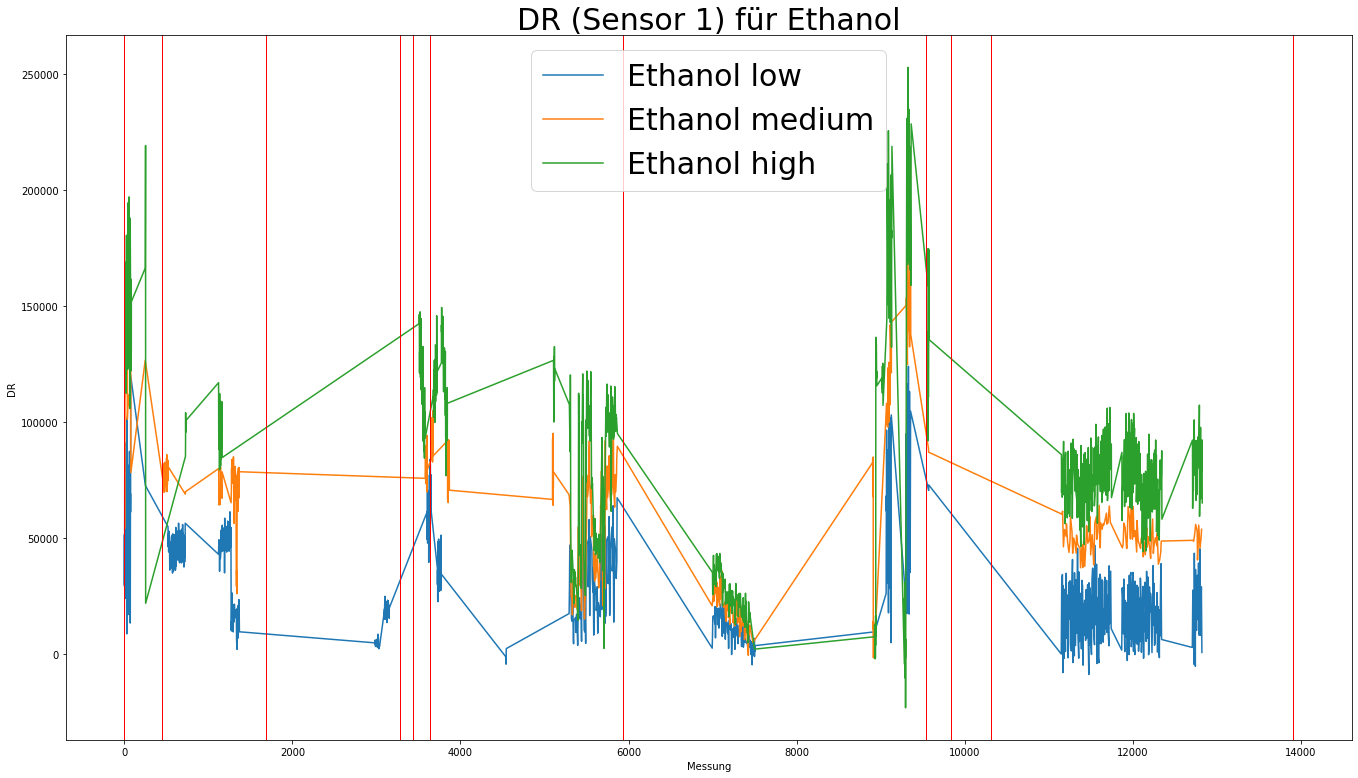

In [2]:
import scripts.splitt



scripts.splitt.show(df_modified)

Der Plot zeigt den `DR` Messwert des ersten Sensors für Ethanol für alle drei Konzentrationsstufen (low, medium und high). Die roten Linien trennen die 10 Batches voneinander. Es ist zu erkennen, dass sich die Messwerte zwischen den verschiedenen Batches stark unterscheiden können (auch innerhalb der Batches). <br>

Die Aufteilung in ein Trainings- und Testsatz erfolgt gemäß einer Zeitreihe (eine Möglichkeit diese aufzuteilen ist 70:30 oder 80:20 (Training:Test) und hängt letztlich von den maximal verfügbaren Datenmengen ab). Die letzten beiden Batches (batch8.csv und batch9.csv) werden für das testen verwendet und von nun an beiseite gelegt.

In [3]:
df_training, df_test = scripts.splitt.splitt(all_files_mod,7)

In [4]:
df_training.shape, df_test.shape

((8905, 129), (5005, 129))

Die verbliebene Trainingsdaten können dann zum Beispiel mit dem `GroupKFold` Kreuzvalidierungsmodell weiter in einen Trainings- und Validierungssatz aufgeteilt werden. Weitere Möglichkeiten zur Aufteilung kann auf der Homepage von SciKit-Learn nachgelesen werden https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html#sphx-glr-auto-examples-model-selection-plot-cv-indices-py. <br>

Als nächstes werden die Trainingsdaten von Ausreißern, fehlenden Werten sowie vom Rauschen bereinigt.

## Do it yourself:


Der Trainings/Testdatensplitt soll auf 80/20 geändert werden.

In [5]:
df_training, df_test = scripts.splitt.splitt(all_files_mod,7)
df_training.shape, df_test.shape

((8905, 129), (5005, 129))